In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file_data.csv')
# Lọc các cột đại diện cho các năm (bắt đầu bằng 'Year_')
year_columns = data.filter(like='Year_').columns
# Tính tổng số công ty trong mỗi năm bằng cách đếm số lượng 1 trong các biến giả năm
year_distribution = data[year_columns].sum()
# Chuyển thành DataFrame để hiển thị dễ đọc
year_distribution_df = year_distribution.reset_index()
year_distribution_df.columns = ['Year', 'Count']
# Tính phần trăm (%) số công ty trong mỗi năm
year_distribution_df['Percentage'] = (year_distribution_df['Count'] / len(data)) * 100
# Hiển thị kết quả
print(year_distribution_df)

        Year  Count  Percentage
0  Year_2016    511   10.656934
1  Year_2017    561   11.699687
2  Year_2018    592   12.346194
3  Year_2019    604   12.596455
4  Year_2020    619   12.909281
5  Year_2021    631   13.159541
6  Year_2022    638   13.305527
7  Year_2023    639   13.326382


In [1]:
import pandas as pd
# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file__data.csv')
# Chọn các biến cần tính thống kê mô tả
variables_of_interest = ['BIG4', 'VOL', 'SIZE', 'LEV', 'SROA', 'M/B', 'INDN', 'INDS', 'R_squared', 'SYN']
# Tính toán thống kê mô tả cho các biến (bao gồm các phân vị)
descriptive_stats = data[variables_of_interest].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
# Hiển thị kết quả
print(descriptive_stats)

              BIG4          VOL         SIZE          LEV         SROA  \
count  4795.000000  4774.000000  4795.000000  4795.000000  4795.000000   
mean      0.284880     0.824529    11.995828     0.462706     0.033418   
std       0.451404     1.634378     0.710550     0.222540     0.037882   
min       0.000000   -18.335699    10.137272     0.000622     0.000055   
5%        0.000000     0.004118    10.929996     0.083610     0.003325   
25%       0.000000     0.060537    11.494724     0.293178     0.011598   
50%       0.000000     0.255285    11.957083     0.469066     0.022060   
75%       1.000000     0.935397    12.400254     0.637385     0.041461   
95%       1.000000     3.561540    13.237487     0.809683     0.100131   
max       1.000000    39.110133    14.824553     1.294990     0.447457   

               M/B         INDN         INDS    R_squared          SYN  
count  4795.000000  4795.000000  4688.000000  4794.000000  4794.000000  
mean      1.338042     2.883522    31.4

In [16]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Đọc dữ liệu từ file CSV (thay đường dẫn này bằng đường dẫn tới file của bạn)
file_path = 'D:/data/file__data.csv'
data = pd.read_csv(file_path)

# Các biến cần winsorize và giới hạn cho từng biến (phần trăm cắt cho mỗi biến)
variables_to_winsorize = {
    'VOL': [0.01, 0.01],  # Cắt 1% ở cả hai đầu cho biến VOL
    'M/B': [0.01, 0.01],  # Cắt 2% ở cả hai đầu cho biến M/B
    'SYNCH': [0.01, 0.01]  # Cắt 5% ở cả hai đầu cho biến SYNCH
}

# Áp dụng winsorization cho từng biến với giới hạn đã chỉ định
for var, limits in variables_to_winsorize.items():
    data[var] = winsorize(data[var], limits=limits)

# Tính toán thống kê mô tả lại sau khi winsorization
variables_of_interest = ['BIG4', 'VOL', 'SIZE', 'LEV', 'S_ROA', 'M/B', 'INDN', 'INDS', 'R_squared', 'SYNCH']
descriptive_stats_after_winsor = data[variables_of_interest].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Hiển thị kết quả
print(descriptive_stats_after_winsor)


              BIG4          VOL         SIZE          LEV        S_ROA  \
count  4795.000000  4004.000000  4795.000000  4795.000000  4795.000000   
mean      0.283837     3.302585    11.995828     0.462706     0.033418   
std       0.450906   152.297405     0.710550     0.222540     0.037882   
min       0.000000     0.000000    10.137272     0.000622     0.000055   
5%        0.000000     0.002217    10.929996     0.083610     0.003325   
25%       0.000000     0.050722    11.494724     0.293178     0.011598   
50%       0.000000     0.234125    11.957083     0.469066     0.022060   
75%       1.000000     0.924361    12.400254     0.637385     0.041461   
95%       1.000000     3.523103    13.237487     0.809683     0.100131   
max       1.000000  9633.947919    14.824553     1.294990     0.447457   

               M/B         INDN         INDS    R_squared        SYNCH  
count  4795.000000  4795.000000  4688.000000  4794.000000  4795.000000  
mean      1.293594     2.883522    31.4

              BIG4          VOL         SIZE          LEV        S_ROA  \
count  4795.000000  4004.000000  4795.000000  4795.000000  4795.000000   
mean      0.284880     0.785813    11.995828     0.462706     0.033418   
std       0.451404     1.299830     0.710550     0.222540     0.037882   
min       0.000000     0.000000    10.137272     0.000622     0.000055   
5%        0.000000     0.002217    10.929996     0.083610     0.003325   
25%       0.000000     0.050722    11.494724     0.293178     0.011598   
50%       0.000000     0.234125    11.957083     0.469066     0.022060   
75%       1.000000     0.924361    12.400254     0.637385     0.041461   
95%       1.000000     3.523103    13.237487     0.809683     0.100131   
max       1.000000     7.172826    14.824553     1.294990     0.447457   

               M/B         INDN         INDS    R_squared        SYNCH  
count  4795.000000  4795.000000  4688.000000  4794.000000  4795.000000  
mean      1.293594     2.883522    31.4

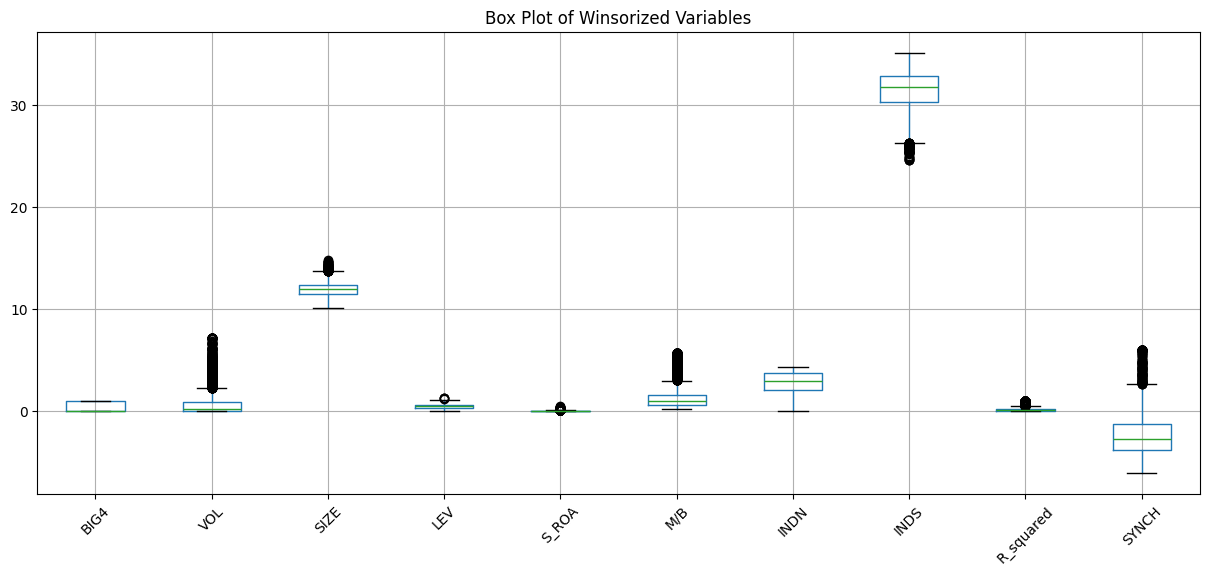

In [36]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV (thay đường dẫn này bằng đường dẫn tới file của bạn)
file_path = 'D:/data/file__data.csv'
data = pd.read_csv(file_path)

# Tính phân vị 1% và 99% của biến VOL
percentile_1_vol = data['VOL'].quantile(0.01)
percentile_99_vol = data['VOL'].quantile(0.99)

# Winsorize thủ công cho biến VOL
data['VOL'] = np.where(data['VOL'] < percentile_1_vol, percentile_1_vol, data['VOL'])
data['VOL'] = np.where(data['VOL'] > percentile_99_vol, percentile_99_vol, data['VOL'])

# Winsorize các biến M/B và SYNCH
variables_to_winsorize = {
    'M/B': [0.01, 0.01],  # Cắt 1% ở cả hai đầu cho biến M/B
    'SYNCH': [0.01, 0.01]  # Cắt 1% ở cả hai đầu cho biến SYNCH
}

for var, limits in variables_to_winsorize.items():
    data[var] = winsorize(data[var], limits=limits)

# Tính toán thống kê mô tả lại sau khi winsorization
variables_of_interest = ['BIG4', 'VOL', 'SIZE', 'LEV', 'S_ROA', 'M/B', 'INDN', 'INDS', 'R_squared', 'SYNCH']
descriptive_stats_after_winsor = data[variables_of_interest].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Hiển thị kết quả thống kê mô tả
print(descriptive_stats_after_winsor)

# Vẽ box plot cho các biến đã winsorized và xếp chúng ngang nhau
plt.figure(figsize=(15, 6))
data[variables_of_interest].boxplot()
plt.title('Box Plot of Winsorized Variables')
plt.xticks(rotation=45)
plt.show()


C:\Users\minhthao372003\AppData\Local\Temp\ipykernel_5676\1298824991.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pvals[i][j] = corr_test[1]  # Lấy p-value từ kiểm định
C:\Users\minhthao372003\AppData\Local\Temp\ipykernel_5676\129882

          SYN    BIG4      VOL     SIZE      LEV     SROA      M/B     INDN  \
SYN       1.0  0.166a   0.393a   0.581a   0.031b   0.070a   0.082a  -0.117a   
BIG4   0.166a     1.0   -0.019   0.367a    0.023   -0.009   0.156a    0.008   
VOL    0.393a  -0.019      1.0   0.247a    0.023   0.090a  -0.125a   0.087a   
SIZE   0.581a  0.367a   0.247a      1.0   0.352a  -0.073a   0.135a   0.107a   
LEV    0.031b   0.023    0.023   0.352a      1.0  -0.234a  -0.061a   0.107a   
SROA   0.070a  -0.009   0.090a  -0.073a  -0.234a      1.0   0.096a  -0.105a   
M/B    0.082a  0.156a  -0.125a   0.135a  -0.061a   0.096a      1.0  -0.072a   
INDN  -0.117a   0.008   0.087a   0.107a   0.107a  -0.105a  -0.072a      1.0   
INDS   0.063a  0.123a   0.173a   0.362a   0.158a   -0.007    0.024   0.776a   

        INDS  
SYN   0.063a  
BIG4  0.123a  
VOL   0.173a  
SIZE  0.362a  
LEV   0.158a  
SROA  -0.007  
M/B    0.024  
INDN  0.776a  
INDS     1.0  


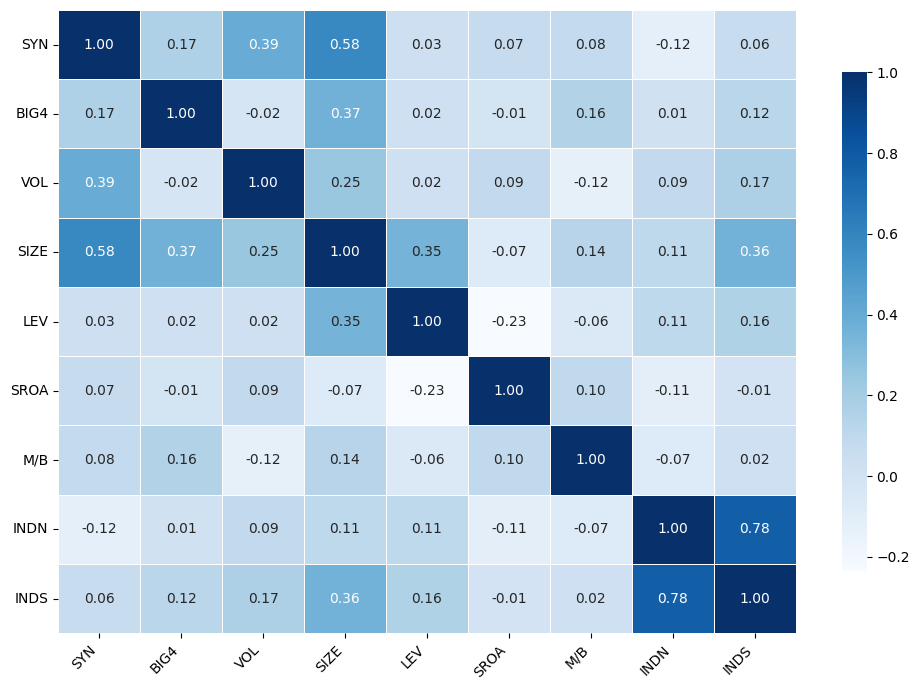

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file__data.csv')

# Thay thế các biến đã chuẩn hóa vào danh sách các biến để tính ma trận tương quan
variables_of_interest = ['SYN', 'BIG4', 'VOL', 'SIZE', 'LEV', 'SROA', 'M/B', 'INDN', 'INDS']

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYN', 'INDS']
for var in trim_variables:
    lower_bound = data[var].quantile(0.02)
    upper_bound = data[var].quantile(0.98)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Tính toán ma trận tương quan
corr_matrix = data[variables_of_interest].corr()

# Hàm để tính p-value cho các hệ số tương quan
def correlation_p_value(df):
    df = df.dropna()  # Loại bỏ giá trị NaN
    pvals = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for i in df.columns:
        for j in df.columns:
            if i != j:
                corr_test = stats.pearsonr(df[i], df[j])
                pvals[i][j] = corr_test[1]  # Lấy p-value từ kiểm định
    return pvals

# Tính toán p-values cho các hệ số tương quan
p_values = correlation_p_value(data[variables_of_interest])

# Gắn ký hiệu a, b, c dựa trên mức ý nghĩa
def apply_significance(corr_matrix, pvals):
    significance_matrix = corr_matrix.copy()
    for i in corr_matrix.columns:
        for j in corr_matrix.columns:
            if i != j:
                if pvals[i][j] <= 0.01:
                    significance_matrix[i][j] = f"{corr_matrix[i][j]:.3f}a"
                elif pvals[i][j] <= 0.05:
                    significance_matrix[i][j] = f"{corr_matrix[i][j]:.3f}b"
                elif pvals[i][j] <= 0.10:
                    significance_matrix[i][j] = f"{corr_matrix[i][j]:.3f}c"
                else:
                    significance_matrix[i][j] = f"{corr_matrix[i][j]:.3f}"
    return significance_matrix

# Áp dụng ký hiệu a, b, c vào ma trận hệ số tương quan
corr_matrix_with_significance = apply_significance(corr_matrix, p_values)

# Hiển thị ma trận hệ số tương quan với ký hiệu mức ý nghĩa
print(corr_matrix_with_significance)

# Vẽ biểu đồ nhiệt cho ma trận hệ số tương quan
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f', cbar_kws={'shrink': .8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [4]:
import pandas as pd
# Đọc dữ liệu từ file CSV (chứa mã công ty 'ma' và ngành 'nganh')
data_with_nganh = pd.read_excel('D:/data/datagoc/khoinganh.xlsx')
# Tính tổng số công ty duy nhất trong mỗi ngành
industry_distribution = data_with_nganh.groupby('nganh')['ma'].nunique().reset_index()
# Đặt tên cho các cột
industry_distribution.columns = ['Industry', 'Company Count']
# Tính phần trăm (%) số công ty trong mỗi ngành
total_companies = data_with_nganh['ma'].nunique()
industry_distribution['Percentage'] = (industry_distribution['Company Count'] / total_companies) * 100
# Hiển thị kết quả
print(industry_distribution)

           Industry  Company Count  Percentage
0  Congnghethongtin             17    2.660407
1            Daukhi              5    0.782473
2    Dichvutieudung             51    7.981221
3     Duocphamvayte             23    3.599374
4      Hangtieudung             95   14.866980
5     Nguyenvatlieu            312   48.826291
6          Taichinh             79   12.363067
7   Tienichcongdong             56    8.763693
8         Vienthong              1    0.156495
